In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:

from sklearn.preprocessing import LabelEncoder

# Load the Dry Bean dataset into a pandas DataFrame
df = pd.read_csv("Dry_Bean.csv")

# Create a LabelEncoder object
le = LabelEncoder()



In [3]:
df.pop('MajorAxisLength')

0        208.178117
1        200.524796
2        212.826130
3        210.557999
4        201.847882
            ...    
13606    288.721612
13607    281.576392
13608    281.539928
13609    283.382636
13610    295.142741
Name: MajorAxisLength, Length: 13611, dtype: float64

In [4]:
df.columns

Index(['Area', 'Perimeter', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Class'],
      dtype='object')

In [5]:
X = df.drop('Class', axis=1)
y = df[['Class']]
z = np.ravel(y)

In [6]:
print(z)

['SEKER' 'SEKER' 'SEKER' ... 'DERMASON' 'DERMASON' 'DERMASON']


In [7]:
label_mapping={'SEKER':0,
              'BARBUNYA':1,
              'BOMBAY':2,
              'CALI':3,
              'HOROZ':4,
              'SIRA':5,
              'DERMASON':6}
df['Class']=df['Class'].map(label_mapping)
y=np.array(df)


In [8]:
print(y.shape)
print(y)

(13611, 16)
[[2.83950000e+04 6.10291000e+02 1.73888747e+02 ... 8.34222388e-01
  9.98723889e-01 0.00000000e+00]
 [2.87340000e+04 6.38018000e+02 1.82734419e+02 ... 9.09850506e-01
  9.98430331e-01 0.00000000e+00]
 [2.93800000e+04 6.24110000e+02 1.75931143e+02 ... 8.25870617e-01
  9.99066137e-01 0.00000000e+00]
 ...
 [4.21390000e+04 7.59321000e+02 1.91187979e+02 ... 6.76884164e-01
  9.96767264e-01 6.00000000e+00]
 [4.21470000e+04 7.63779000e+02 1.90275731e+02 ... 6.68236684e-01
  9.95222420e-01 6.00000000e+00]
 [4.21590000e+04 7.72237000e+02 1.82204716e+02 ... 6.16220592e-01
  9.98179623e-01 6.00000000e+00]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
print('R-squared score:', regressor.score(X_test, y_test))

R-squared score: 0.9857404175254698


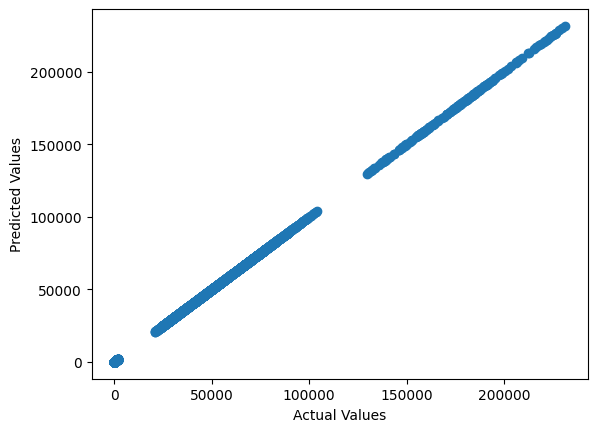

In [10]:
regressor.fit(X_train, y_train)

# Predict the output using the trained model
y_pred = regressor.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot the line of best fit
plt.plot(range(10), range(10))
plt.show()

In [11]:
print(regressor.intercept_)
print(regressor.coef_)

[-4.36557457e-11 -3.75166564e-12 -1.13686838e-13  6.28386232e-14
 -1.59872116e-14 -2.18278728e-11  6.82121026e-13  2.33146835e-15
  4.10782519e-15  4.88498131e-15 -5.21804822e-15  9.62771529e-17
  2.31368744e-16  1.11022302e-15  3.66373598e-15 -1.41699641e+03]
[[ 1.00000000e+00 -1.03264589e-15 -1.12778475e-13  1.87097919e-12
  -3.73887881e-13  5.99397153e-16  1.04892039e-13  5.54532221e-13
   5.21916012e-12 -9.85484136e-13  5.83602978e-11  1.09150397e-09
  -3.58004831e-09  5.27764742e-12 -2.39929304e-11]
 [ 1.16513453e-16  1.00000000e+00  2.06497146e-15 -5.59996771e-13
   3.35756644e-13  0.00000000e+00 -9.25908655e-16 -8.38505041e-15
   4.88535967e-13 -3.55950704e-14 -1.22022549e-11 -2.40972386e-12
  -2.64955653e-12  6.27877929e-12  7.96426019e-13]
 [ 3.33310058e-18  4.96564595e-17  1.00000000e+00 -6.32162985e-14
  -4.69480530e-14 -4.98732999e-18 -1.55760889e-17 -1.31109481e-15
  -8.56918680e-15  1.61548694e-14 -6.37920883e-13 -7.52093903e-13
   3.58688640e-12  2.67879276e-13  6.484661

In [12]:
y_pred=regressor.predict(X)
print(y_pred)

[[2.83950000e+04 6.10291000e+02 1.73888747e+02 ... 8.34222388e-01
  9.98723889e-01 2.06190063e+00]
 [2.87340000e+04 6.38018000e+02 1.82734419e+02 ... 9.09850506e-01
  9.98430331e-01 1.04492131e+00]
 [2.93800000e+04 6.24110000e+02 1.75931143e+02 ... 8.25870617e-01
  9.99066137e-01 1.85555325e+00]
 ...
 [4.21390000e+04 7.59321000e+02 1.91187979e+02 ... 6.76884164e-01
  9.96767264e-01 4.49064942e+00]
 [4.21470000e+04 7.63779000e+02 1.90275731e+02 ... 6.68236684e-01
  9.95222420e-01 4.76195780e+00]
 [4.21590000e+04 7.72237000e+02 1.82204716e+02 ... 6.16220592e-01
  9.98179623e-01 4.96553732e+00]]


In [13]:
print(X.shape)
print(z.shape)

(13611, 15)
(13611,)


In [14]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, z_train)
z_pred=regressor.predict(X)

C:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


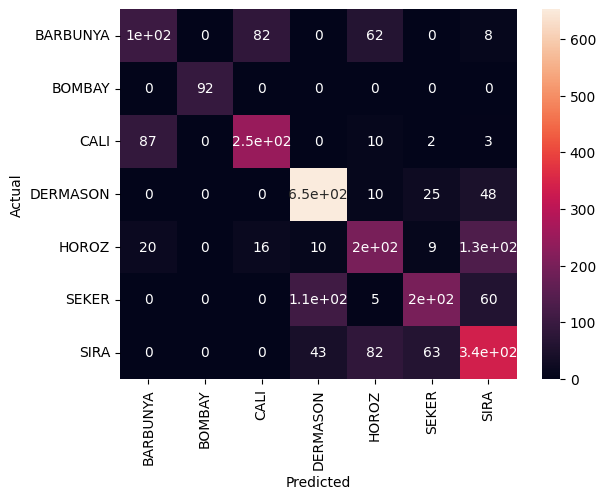

In [45]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, z_train)

# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

z_pred = logistic_regression.predict(X_test)
confusion_matrix = pd.crosstab(z_test, z_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
knn.fit(X_train, z_train)
predictions=knn.predict(X_test)
accuracy=metrics.accuracy_score(z_test,predictions)
print("accuracy= ",predictions)
pred = knn.predict(X_test)
metrics.accuracy_score(z_test,pred)


accuracy=  ['DERMASON' 'DERMASON' 'SEKER' ... 'SEKER' 'HOROZ' 'DERMASON']


0.6929856775615131

In [16]:
# Support Vector Machines
from sklearn import svm
model=svm.SVC()
model.fit(X_train, z_train)
print(model)

SVC()
